In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import re
from textblob import TextBlob
import string

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\SEMESTER 4\RM\tiktok.csv")


In [3]:
df.head()

review_description  rating      review_date
0  This app keeps blocking me from making my acco...       5  9/24/2018 21:31
1                                                Fun       5  10/6/2022 15:54
2  NO BIG COMMENT ONLY ONE I CAN SAY I'M HAPPY AB...       5  10/7/2022 15:54
3                                    It's a good app       1  10/8/2022 15:54
4                                                Bad       1  10/9/2022 15:54

In [4]:
df.tail()

review_description  rating       review_date
210538                                  Good app.       4  10/15/2022 20:58
210539  Worst app I ever used. AVOID at all cost.       1  10/15/2022 20:54
210540                      It cheaper usable yaa       5  10/15/2022 20:54
210541            This app using very compostable       5    7/9/2022 12:28
210542                Better then other fake apps       5    7/9/2022 12:27

In [5]:
df.shape

(210543, 3)

In [6]:
sns.displot(df['rating'])

In [7]:
print(df.columns)

if 'review_date' in df.columns:
    print("Column 'review_date' exists in the DataFrame.")
else:
    print("Column 'review_date' does not exist in the DataFrame.")


Index(['review_description', 'rating', 'review_date'], dtype='object')
Column 'review_date' exists in the DataFrame.


In [8]:
df

review_description  rating  \
0       This app keeps blocking me from making my acco...       5   
1                                                     Fun       5   
2       NO BIG COMMENT ONLY ONE I CAN SAY I'M HAPPY AB...       5   
3                                         It's a good app       1   
4                                                     Bad       1   
...                                                   ...     ...   
210538                                          Good app.       4   
210539          Worst app I ever used. AVOID at all cost.       1   
210540                              It cheaper usable yaa       5   
210541                    This app using very compostable       5   
210542                        Better then other fake apps       5   

             review_date  
0        9/24/2018 21:31  
1        10/6/2022 15:54  
2        10/7/2022 15:54  
3        10/8/2022 15:54  
4        10/9/2022 15:54  
...                  ...  
210538  10/15/2022 20:58  
210539  10/15/2022 20:54  
210540  10/15/2022 20:54  
210541    7/9/2022 12:28  
210542    7/9/2022 12:27  

[210543 rows x 3 columns]

In [9]:
cor=df.corr()
cor

rating
rating     1.0

In [10]:
from sklearn import preprocessing
df = df.drop('review_date', axis=1)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [11]:
X

review_description
0       This app keeps blocking me from making my acco...
1                                                     Fun
2       NO BIG COMMENT ONLY ONE I CAN SAY I'M HAPPY AB...
3                                         It's a good app
4                                                     Bad
...                                                   ...
210538                                          Good app.
210539          Worst app I ever used. AVOID at all cost.
210540                              It cheaper usable yaa
210541                    This app using very compostable
210542                        Better then other fake apps

[210543 rows x 1 columns]

In [12]:
Y

0         5
1         5
2         5
3         1
4         1
         ..
210538    4
210539    1
210540    5
210541    5
210542    5
Name: rating, Length: 210543, dtype: int64

In [13]:
# sentiment_data = X[["review_description", "rating"]]
sentiment_data = X[["review_description"]].dropna()
sentiment_data = sentiment_data.join(Y)
print(sentiment_data)

                                       review_description  rating
0       This app keeps blocking me from making my acco...       5
1                                                     Fun       5
2       NO BIG COMMENT ONLY ONE I CAN SAY I'M HAPPY AB...       5
3                                         It's a good app       1
4                                                     Bad       1
...                                                   ...     ...
210538                                          Good app.       4
210539          Worst app I ever used. AVOID at all cost.       1
210540                              It cheaper usable yaa       5
210541                    This app using very compostable       5
210542                        Better then other fake apps       5

[210533 rows x 2 columns]


In [14]:
sentiment_data.isnull().sum()

review_description    0
rating                0
dtype: int64

In [15]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Preprocessing
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
sentiment_data['review_description'] = sentiment_data['review_description'].apply(clean)


In [18]:
def remove_emoticons(text):
    if isinstance(text, str):
        emoticon_pattern = re.compile("["
                                      u"\U0001F600-\U0001F64F"  # emoticons
                                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                      u"\U0001F700-\U0001F77F"  # alchemical symbols
                                      u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                      u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                      u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                      u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                      u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                      u"\U00002702-\U000027B0"  # Dingbats
                                      u"\U000024C2-\U0001F251"
                                      "]+", flags=re.UNICODE)
        return emoticon_pattern.sub(r'', text)
    else:
        return text

sentiment_data['review_description'] = sentiment_data['review_description'].apply(remove_emoticons)
sentiment_data.columns = [col.lower() for col in sentiment_data.columns]

# Menampilkan hasil
print(sentiment_data)

                                       review_description  rating
0       app keep block make account wont let continu a...       5
1                                                     fun       5
2       big comment one say im happi app thank â¤â¤â...       5
3                                                good app       1
4                                                     bad       1
...                                                   ...     ...
210538                                           good app       4
210539                      worst app ever use avoid cost       1
210540                                  cheaper usabl yaa       5
210541                                    app use compost       5
210542                                    better fake app       5

[210533 rows x 2 columns]


In [19]:
rating_mapping = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
sentiment_data['rating'] = sentiment_data['rating'].map(rating_mapping)

In [20]:
sentiment_data.head(10)

review_description    rating
0  app keep block make account wont let continu a...  Positive
1                                                fun  Positive
2  big comment one say im happi app thank â¤â¤â...  Positive
3                                           good app  Negative
4                                                bad  Negative
5  tik tok good app experi vergood app video poho...  Positive
6                                           good app  Positive
7                                spend much time lol  Positive
8                                               glad  Positive
9                                             beauti   Neutral

In [21]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [22]:
def stem_words(text):
    y = []
    for word in text.split():  # Split the text into words
        y.append(ps.stem(word))
    return y
sentiment_data['review_description'] = sentiment_data['review_description'].apply(stem_words)

print(sentiment_data)

                                       review_description    rating
0       [app, keep, block, make, account, wont, let, c...  Positive
1                                                   [fun]  Positive
2       [big, comment, one, say, im, happi, app, thank...  Positive
3                                             [good, app]  Negative
4                                                   [bad]  Negative
...                                                   ...       ...
210538                                        [good, app]  Positive
210539               [worst, app, ever, use, avoid, cost]  Negative
210540                              [cheaper, usabl, yaa]  Positive
210541                                [app, use, compost]  Positive
210542                                [better, fake, app]  Positive

[210533 rows x 2 columns]


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer

In [24]:
def join_back(list_input):
    return " ".join(list_input)

sentiment_data['review_description']=sentiment_data['review_description'].apply(join_back)
X=sentiment_data.iloc[:,0:1].values

In [25]:
X.shape

(210533, 1)

In [26]:
cv=CountVectorizer(max_features=1000)

In [27]:
X = cv.fit_transform(sentiment_data['review_description']).toarray()

X.shape

(210533, 1000)

In [28]:
X[0]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
X[0].max()

2

In [30]:
y=sentiment_data.iloc[:,-1].values

In [31]:
y

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [32]:
y.shape

(210533,)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Train set",X_train.shape, y_train.shape)
print("Test set",X_test.shape, y_test.shape)

Train set (168426, 1000) (168426,)
Test set (42107, 1000) (42107,)


In [58]:
clf1 = MultinomialNB()

In [59]:
    clf1.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred1=clf1.predict(X_test)

In [37]:
y_pred1.shape

(42107,)

In [38]:
y_test.shape

(42107,)

In [39]:
print("Gaussian NB acc=",accuracy_score(y_test,y_pred1))

Gaussian NB acc= 0.7452442586743296


In [40]:
def calculate_sentiments(ds):
    sentiments = TextBlob(ds['review_description']).sentiment
    return pd.Series([sentiments.subjectivity, sentiments.polarity])

In [41]:
sentiment_data[['Subjectivity', 'Polarity']] = sentiment_data.apply(calculate_sentiments, axis = 1)
sentiment_data.head()

review_description    rating  Subjectivity  \
0  app keep block make account wont let continu a...  Positive      0.166667   
1                                                fun  Positive      0.200000   
2  big comment one say im happi app thank â¤â¤â...  Positive      0.100000   
3                                           good app  Negative      0.600000   
4                                                bad  Negative      0.666667   

   Polarity  
0 -0.166667  
1  0.300000  
2  0.000000  
3  0.700000  
4 -0.700000

In [42]:
def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [43]:
sentiment_data['Sentiment Analysis'] = sentiment_data['Polarity'].apply(categorize_sentiment)
sentiment_data.head()

review_description    rating  Subjectivity  \
0  app keep block make account wont let continu a...  Positive      0.166667   
1                                                fun  Positive      0.200000   
2  big comment one say im happi app thank â¤â¤â...  Positive      0.100000   
3                                           good app  Negative      0.600000   
4                                                bad  Negative      0.666667   

   Polarity Sentiment Analysis  
0 -0.166667           Negative  
1  0.300000           Positive  
2  0.000000            Neutral  
3  0.700000           Positive  
4 -0.700000           Negative

<AxesSubplot:xlabel='Polarity', ylabel='Density'>

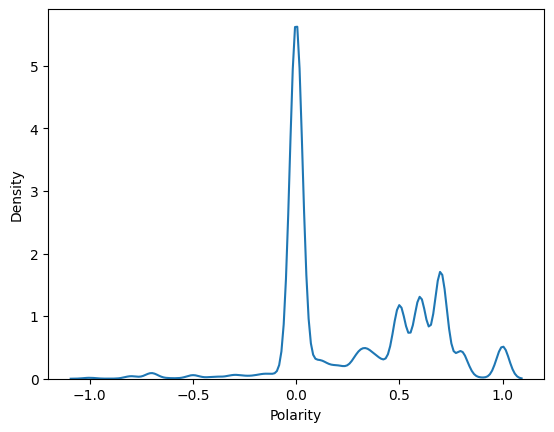

In [44]:
sns.kdeplot(data = sentiment_data, x = "Polarity")

In [45]:
sns.histplot(data = sentiment_data, x = 'Polarity')

<AxesSubplot:xlabel='Polarity', ylabel='Count'>

<AxesSubplot:xlabel='Sentiment Analysis', ylabel='count'>

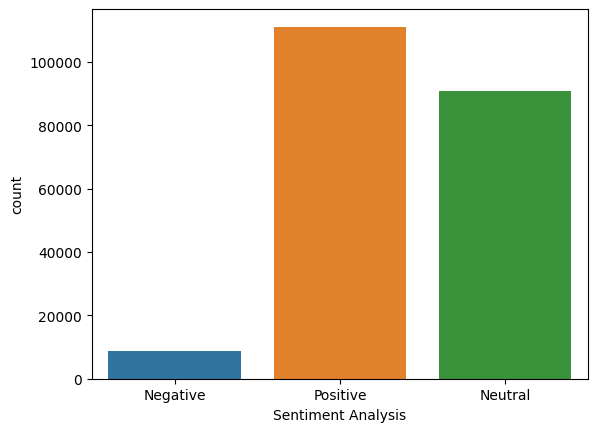

In [46]:
sns.countplot(data = sentiment_data, x = 'Sentiment Analysis')

In [47]:
#model
dataset = sentiment_data
dataset.rename(columns= {'review_description' : 'text'}, inplace = True)
dataset = dataset[['text', 'Sentiment Analysis']]
dataset

text Sentiment Analysis
0       app keep block make account wont let continu a...           Negative
1                                                     fun           Positive
2       big comment one say im happi app thank â¤â¤â...            Neutral
3                                                good app           Positive
4                                                     bad           Negative
...                                                   ...                ...
210538                                           good app           Positive
210539                      worst app ever use avoid cost           Negative
210540                                  cheaper usabl yaa            Neutral
210541                                    app use compost            Neutral
210542                                    better fake app            Neutral

[210533 rows x 2 columns]

In [48]:
le = LabelEncoder()
dataset['Sentiment Analysis'] = le.fit_transform(dataset['Sentiment Analysis'])

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
X = dataset['text']
y = dataset['Sentiment Analysis']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
the_pipeline = Pipeline([
    ('vectorizing', CountVectorizer(max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [62]:
the_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [63]:
prediction = the_pipeline.predict(xtest)

In [64]:
confusion_matrix(ytest, prediction)

array([[  180,   200,  1357],
       [    0, 13214,  4999],
       [    0,   378, 21779]], dtype=int64)

In [65]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       1.00      0.10      0.19      1737
           1       0.96      0.73      0.83     18213
           2       0.77      0.98      0.87     22157

    accuracy                           0.84     42107
   macro avg       0.91      0.60      0.63     42107
weighted avg       0.86      0.84      0.82     42107



In [66]:
prediction = the_pipeline.predict(xtrain)

In [67]:
print(classification_report(ytrain, prediction))

              precision    recall  f1-score   support

           0       0.95      0.14      0.24      6884
           1       0.97      0.83      0.89     72589
           2       0.83      0.98      0.90     88953

    accuracy                           0.88    168426
   macro avg       0.92      0.65      0.68    168426
weighted avg       0.90      0.88      0.87    168426

